In [112]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

!pip install yfinance
import yfinance as yf

from datetime import datetime



end = datetime.now()
start = datetime(end.year - 5, end.month, end.day)

apple = yf.download("AAPL", start, end)

[*********************100%%**********************]  1 of 1 completed


In [113]:
apple.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,115.651069,117.017255,114.369551,115.749620,114.332679,1.075482e+08
std,46.956414,47.438170,46.489623,46.972990,47.259623,5.459865e+07
min,35.994999,36.430000,35.500000,35.547501,34.163834,3.145820e+07
25%,65.940001,66.846249,65.550001,66.406248,64.780319,7.225568e+07
50%,128.728745,130.339996,126.970001,128.855003,126.740231,9.302575e+07
75%,152.205002,154.210003,150.377502,152.362495,151.252548,1.268662e+08
max,196.240005,198.229996,195.279999,196.449997,196.185074,4.265100e+08


In [114]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2018-09-24 to 2023-09-22
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1258 non-null   float64
 1   High       1258 non-null   float64
 2   Low        1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Adj Close  1258 non-null   float64
 5   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.8 KB


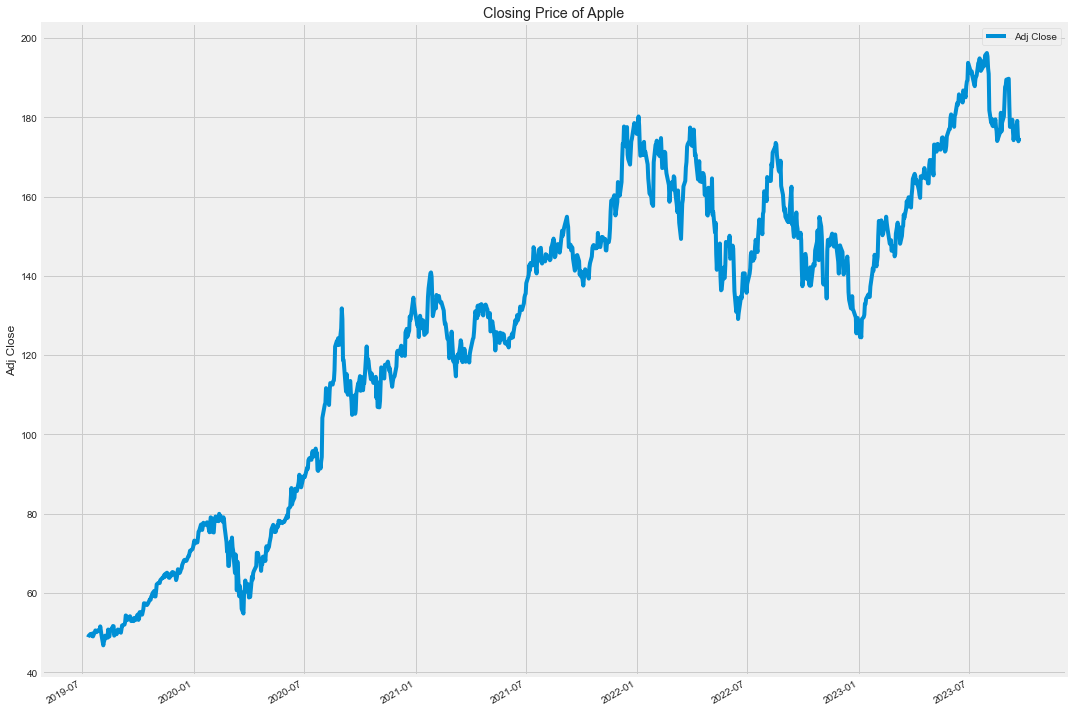

In [123]:
plt.figure(figsize=(15, 10))

apple['Adj Close'].plot()
plt.ylabel('Adj Close')
plt.xlabel(None)
plt.title(f"Closing Price of Apple")
plt.legend()
plt.tight_layout()

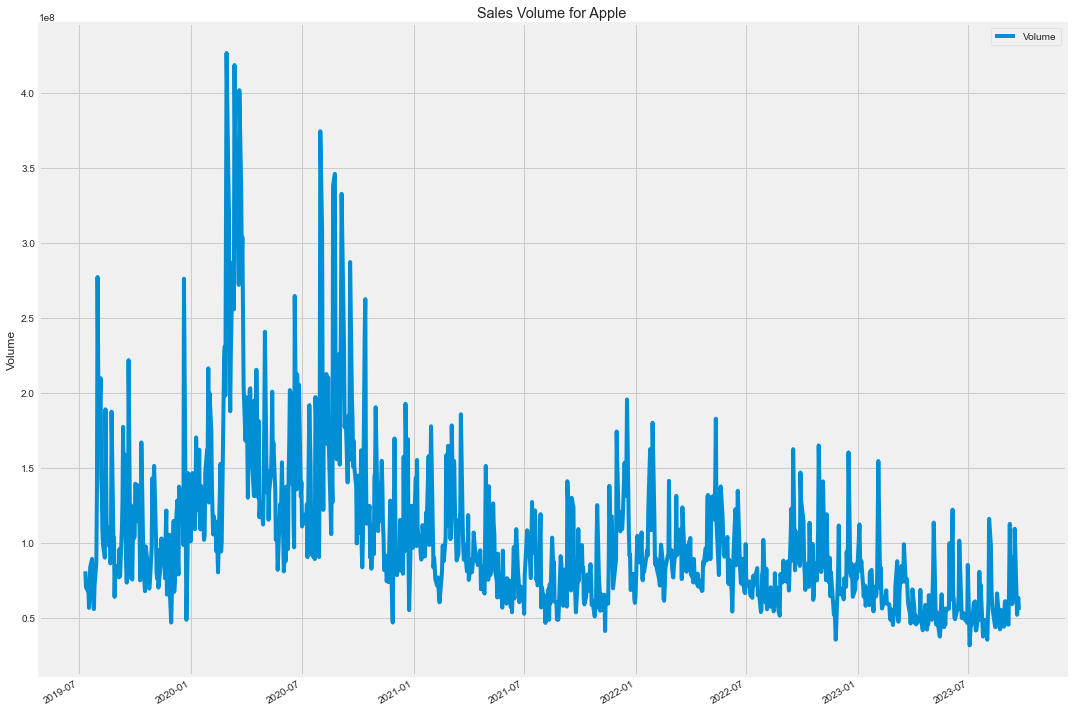

In [124]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))

apple['Volume'].plot()
plt.ylabel('Volume')
plt.xlabel(None)
plt.title(f"Sales Volume for Apple")
plt.legend()
plt.tight_layout()

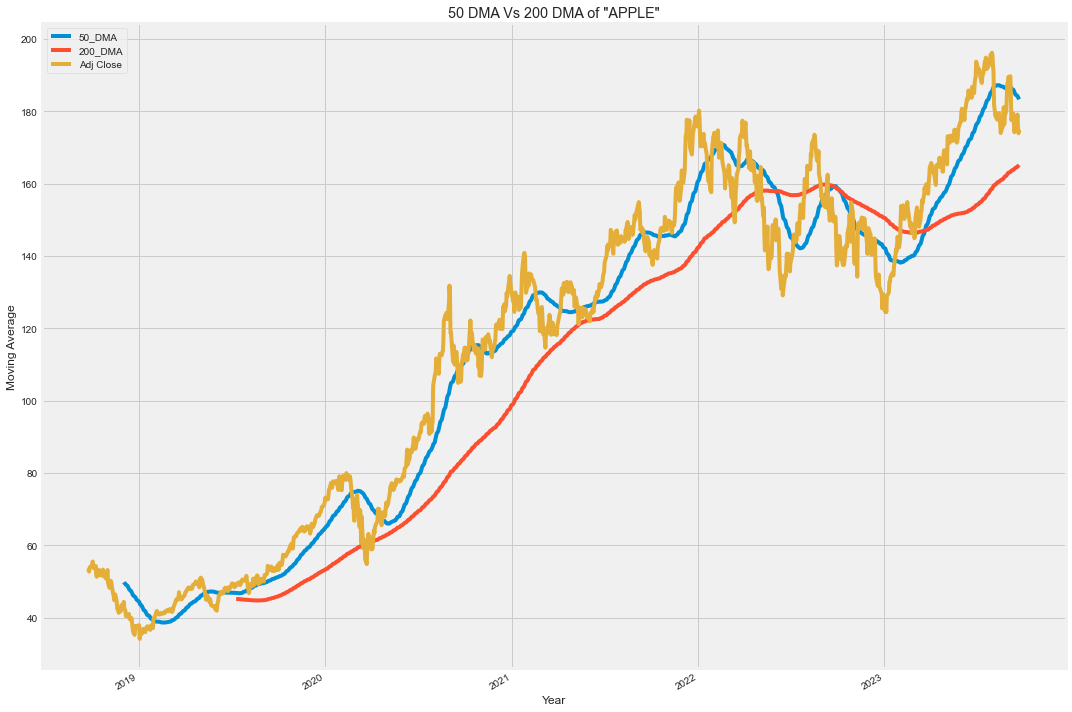

In [117]:
ma_day = [50, 200]

for ma in ma_day:
        column_name = f"{ma}_DMA"
        apple[column_name] = apple['Adj Close'].rolling(ma).mean()

plt.figure(figsize=(15, 10))
apple['50_DMA'].plot()
apple['200_DMA'].plot()
apple['Adj Close'].plot()
plt.ylabel('Moving Average')
plt.xlabel("Year")
plt.title("50 DMA Vs 200 DMA of \"APPLE\"")
plt.legend()
plt.tight_layout()

In [118]:
apple['Down_Cross'] = ((apple['50_DMA']< apple['200_DMA']) & 
                       (apple['50_DMA'].shift(1) > apple['200_DMA'].shift(1))).astype(int)
apple['Up_Cross'] = ((apple['50_DMA']> apple['200_DMA']) & 
                       (apple['50_DMA'].shift(1) < apple['200_DMA'].shift(1))).astype(int)


In [119]:
apple['CrossOver']=(apple["Down_Cross"]+apple["Up_Cross"]>=1).astype(int)
apple

,Open,High,Low,Close,Adj Close,Volume,50_DMA,200_DMA,Down_Cross,Up_Cross,CrossOver
Date,,,,,,,,,,,
2018-09-24,54.205002,55.314999,54.157501,55.197498,52.864510,110773600,NaN,NaN,0,0,0
2018-09-25,54.937500,55.705002,54.924999,55.547501,53.199711,98217600,NaN,NaN,0,0,0
2018-09-26,55.250000,55.937500,54.939999,55.105000,52.775909,95938800,NaN,NaN,0,0,0
2018-09-27,55.955002,56.610001,55.884998,56.237499,53.860558,120724800,NaN,NaN,0,0,0
2018-09-28,56.197498,56.459999,56.005001,56.435001,54.049702,91717600,NaN,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2023-09-18,176.479996,179.380005,176.169998,177.970001,177.970001,67257600,184.342663,164.564343,0,0,0
2023-09-19,177.520004,179.630005,177.130005,179.070007,179.070007,51826900,184.156950,164.722687,0,0,0
2023-09-20,179.259995,179.699997,175.399994,175.490005,175.490005,58436200,183.910222,164.861737,0,0,0


# Using Classification

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
data=apple;
data.dropna(inplace=True)
y = data['CrossOver']
data.drop(['Down_Cross','Up_Cross','CrossOver'], axis=1)
X=data
 
 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

# Create and train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred=model.predict(X_test)
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9962264150943396


# Prophet Model

In [121]:
!pip install yfinance
!pip install prophet

[*********************100%%**********************]  1 of 1 completed


11:09:37 - cmdstanpy - INFO - Chain [1] start processing
11:09:38 - cmdstanpy - INFO - Chain [1] done processing


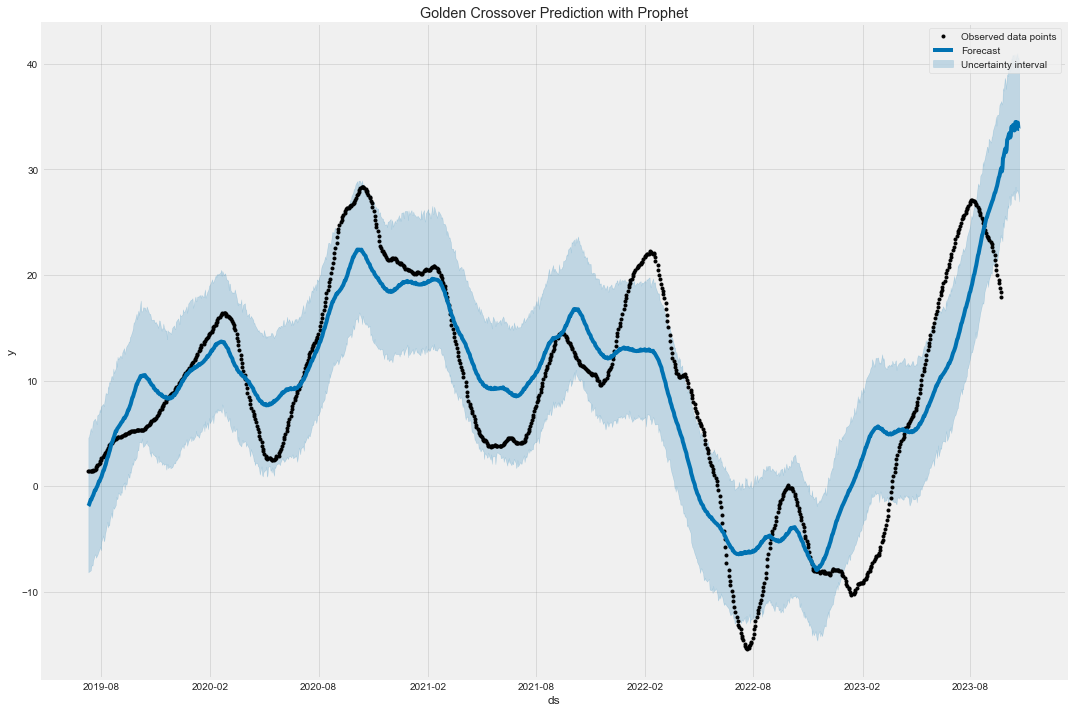

In [127]:
# Fetch historical data
from matplotlib import dates as mdates
stock_symbol = 'AAPL'
end = datetime.now()
start = datetime(end.year - 5, end.month, end.day)
df = yf.download(stock_symbol, start=start, end=end)

# Calculate the 50DMA and 200DMA
df['50DMA'] = df['Close'].rolling(window=50).mean()
df['200DMA'] = df['Close'].rolling(window=200).mean()
df['diff']=df['50DMA']-df['200DMA']

# Create a DataFrame with 'ds' (datestamp) and 'y' (the difference between 50DMA and 200DMA)
df = df.reset_index()  # Reset the index to access the 'Date' column
df = df[['Date', 'diff']].rename(columns={'Date': 'ds', 'diff': 'y'}).dropna()
df
# Create and fit the Prophet model
model = Prophet()
model.fit(df)

# Create a future DataFrame
future = model.make_future_dataframe(periods=30, freq='D')  # Extend 30 days into the future

# Make predictions
forecast = model.predict(future)


# Plot the forecast
plt.figure(figsize=(15, 10))
ax = plt.subplot(1, 1, 1)

# Plot the forecast within the same subplot using the 'ax' parameter
model.plot(forecast, ax=ax)

# Customize plot properties (title, legend, etc.)
plt.title('Golden Crossover Prediction with Prophet')
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

# Checking the Forecast Results

In [129]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-07-11,2.309135,-8.162578,4.615615,2.309135,2.309135,-4.185700,-4.185700,-4.185700,0.179219,0.179219,0.179219,-4.364919,-4.364919,-4.364919,0.0,0.0,0.0,-1.876565
1,2019-07-12,2.343094,-8.093923,4.668102,2.343094,2.343094,-4.129168,-4.129168,-4.129168,0.143060,0.143060,0.143060,-4.272228,-4.272228,-4.272228,0.0,0.0,0.0,-1.786075
2,2019-07-15,2.444971,-7.977525,5.510766,2.444971,2.444971,-3.716813,-3.716813,-3.716813,0.268038,0.268038,0.268038,-3.984851,-3.984851,-3.984851,0.0,0.0,0.0,-1.271842
3,2019-07-16,2.478930,-7.578459,5.215059,2.478930,2.478930,-3.748052,-3.748052,-3.748052,0.140155,0.140155,0.140155,-3.888207,-3.888207,-3.888207,0.0,0.0,0.0,-1.269122
4,2019-07-17,2.512889,-7.468924,5.167482,2.512889,2.512889,-3.617410,-3.617410,-3.617410,0.174664,0.174664,0.174664,-3.792074,-3.792074,-3.792074,0.0,0.0,0.0,-1.104521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1084,2023-10-18,29.886023,27.953122,40.727321,29.814158,29.947123,4.547106,4.547106,4.547106,0.174664,0.174664,0.174664,4.372442,4.372442,4.372442,0.0,0.0,0.0,34.433128
1085,2023-10-19,30.003868,28.059888,41.004930,29.923868,30.075962,4.444617,4.444617,4.444617,0.179219,0.179219,0.179219,4.265398,4.265398,4.265398,0.0,0.0,0.0,34.448485
1086,2023-10-20,30.121713,27.840996,40.466278,30.032617,30.202683,4.296408,4.296408,4.296408,0.143060,0.143060,0.143060,4.153348,4.153348,4.153348,0.0,0.0,0.0,34.418121
1087,2023-10-21,30.239559,27.667106,40.601207,30.142210,30.329095,3.584981,3.584981,3.584981,-0.452568,-0.452568,-0.452568,4.037549,4.037549,4.037549,0.0,0.0,0.0,33.824539


In [143]:
downCross=forecast[(forecast['yhat'].shift(1)>0) & (forecast['yhat']<=0)]
upCross=forecast[(forecast['yhat'].shift(1)<0) & (forecast['yhat']>=0)]

In [144]:
downCross

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
704,2022-04-26,4.017446,-6.562898,6.386682,4.017446,4.017446,-4.168253,-4.168253,-4.168253,0.140155,0.140155,0.140155,-4.308408,-4.308408,-4.308408,0.0,0.0,0.0,-0.150807


In [145]:
upCross

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
12,2019-07-29,2.920398,-6.036682,6.856581,2.920398,2.920398,-2.442222,-2.442222,-2.442222,0.268038,0.268038,0.268038,-2.710260,-2.710260,-2.710260,0.0,0.0,0.0,0.478176
886,2023-01-17,-2.403601,-6.002705,6.772649,-2.403601,-2.403601,2.852386,2.852386,2.852386,0.140155,0.140155,0.140155,2.712231,2.712231,2.712231,0.0,0.0,0.0,0.448785
